## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=76)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,3.0,2.0,4.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.0,5.0,Green
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.0,9.0,Blue
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.0,7.0,Green
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.5,9.0,Blue
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,NaN,NaN,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Mostafa Mohamed,Male,Computer Engineering,Senior Student,22,5.0,4.0,3.0,2.0,...,10.0,6.0,10.0,9.0,9.0,8.0,10.0,8.0,10.0,Green
72,73,Mahmoud Yasser,Male,Engineering,Student,21,4.0,4.0,5.0,3.0,...,10.0,9.0,9.0,8.0,8.0,9.0,10.0,10.0,8.0,Green
73,74,Abdelrahman,Male,Engineering,Senior Student,21,4.0,2.0,4.0,2.0,...,6.0,7.0,9.0,9.0,10.0,3.0,9.0,7.0,6.0,Blue
74,75,Hassan,Male,Business,Student,19,4.0,3.0,3.0,1.0,...,4.0,7.0,8.0,9.0,9.0,4.0,10.0,7.0,7.0,Blue


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
dtype: object

In [4]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [5]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [6]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Extra_interface_1    7.894737
Extra_interface_2    7.894737
Test_Score           0.000000
dtype: float64

In [7]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [8]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [9]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
dtype: float64

In [10]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,22.618421,3.980263,3.328947,3.460526,2.677632,3.296053,6.861842,6.042105,6.025000,...,6.925000,5.811842,7.282895,6.671053,6.578947,7.065789,7.878947,6.165714,6.174286,1.592105
std,22.083176,6.790124,0.818294,1.250474,0.919287,1.446153,1.329606,1.767482,1.939434,1.942035,...,1.909494,1.969769,2.064777,2.259134,2.280428,1.759436,1.896756,2.089139,2.184227,1.085389
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,2.000000,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000
25%,19.750000,20.000000,3.000000,2.000000,3.000000,1.000000,2.000000,6.000000,5.000000,5.000000,...,6.000000,4.000000,6.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,1.000000
50%,38.500000,21.000000,4.000000,3.000000,3.000000,3.000000,3.000000,7.000000,6.000000,6.000000,...,7.000000,6.000000,8.000000,7.000000,7.000000,7.000000,8.000000,6.165714,6.174286,2.000000
75%,57.250000,22.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,8.000000,7.000000,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,3.000000
max,76.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


# Statistical analysis

In [12]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
Id,1.000000,0.040000,-0.060000,-0.090000,-0.040000,-0.250000,-0.010000,-0.060000,-0.200000,-0.160000,0.070000,-0.220000,-0.070000,-0.130000,0.100000,0.020000,0.300000,-0.100000,-0.060000,-0.090000,-0.170000,-0.230000,-0.210000,0.010000,0.050000,0.080000,0.050000
Age,0.040000,1.000000,0.020000,0.220000,0.240000,0.230000,0.050000,0.110000,0.080000,0.070000,0.190000,0.060000,0.130000,-0.010000,0.050000,0.050000,-0.100000,-0.000000,0.040000,0.070000,0.170000,0.200000,0.100000,-0.050000,0.190000,0.050000,-0.070000
Openness,-0.060000,0.020000,1.000000,0.310000,0.110000,0.240000,-0.070000,-0.020000,-0.000000,0.030000,0.140000,0.210000,0.080000,0.020000,-0.010000,-0.050000,0.090000,0.040000,-0.060000,0.190000,0.070000,-0.020000,0.140000,0.110000,0.070000,-0.110000,-0.050000
Extraversion,-0.090000,0.220000,0.310000,1.000000,0.050000,-0.000000,-0.060000,-0.130000,0.140000,0.050000,0.220000,0.110000,0.110000,0.080000,-0.020000,0.040000,0.030000,0.000000,-0.040000,0.030000,0.050000,-0.000000,0.170000,-0.070000,0.170000,-0.120000,0.040000
Agreeableness,-0.040000,0.240000,0.110000,0.050000,1.000000,0.070000,0.170000,0.010000,0.060000,0.100000,0.060000,0.120000,-0.040000,-0.110000,-0.070000,0.110000,-0.190000,-0.080000,0.070000,-0.060000,0.040000,0.050000,0.050000,-0.080000,0.090000,-0.010000,-0.120000
Conscientiousness,-0.250000,0.230000,0.240000,-0.000000,0.070000,1.000000,0.040000,0.080000,0.130000,-0.020000,0.050000,0.070000,0.070000,0.040000,0.010000,0.140000,0.020000,0.090000,-0.110000,0.140000,0.110000,0.030000,0.070000,0.060000,0.020000,0.010000,-0.110000
Neuroticism,-0.010000,0.050000,-0.070000,-0.060000,0.170000,0.040000,1.000000,0.250000,0.140000,0.220000,0.150000,0.160000,0.040000,-0.000000,-0.030000,0.100000,0.190000,0.100000,0.180000,0.090000,-0.020000,0.010000,0.010000,-0.010000,0.080000,0.060000,0.090000
Interface_1,-0.060000,0.110000,-0.020000,-0.130000,0.010000,0.080000,0.250000,1.000000,0.710000,0.780000,0.420000,0.550000,0.140000,0.150000,0.040000,0.080000,0.220000,0.460000,0.390000,0.200000,0.160000,0.330000,0.210000,0.420000,0.240000,0.210000,-0.070000
Interface_2,-0.200000,0.080000,-0.000000,0.140000,0.060000,0.130000,0.140000,0.710000,1.000000,0.740000,0.420000,0.430000,0.210000,0.280000,0.180000,0.230000,0.200000,0.340000,0.340000,0.240000,0.210000,0.340000,0.260000,0.340000,0.320000,0.160000,-0.050000
Interface_3,-0.160000,0.070000,0.030000,0.050000,0.100000,-0.020000,0.220000,0.780000,0.740000,1.000000,0.310000,0.370000,0.230000,0.230000,0.030000,0.060000,0.220000,0.390000,0.300000,0.180000,0.190000,0.350000,0.200000,0.350000,0.310000,0.150000,-0.010000


<AxesSubplot:xlabel='Gender', ylabel='Count'>

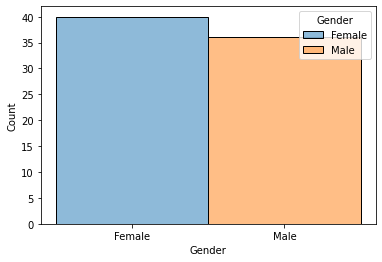

In [13]:
sns.histplot(x='Gender', hue='Gender', data=data)


<AxesSubplot:xlabel='Test_Score', ylabel='Count'>

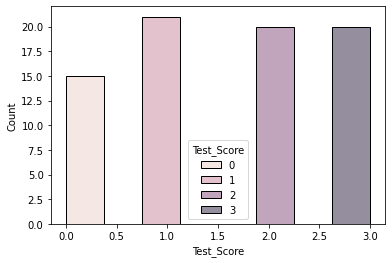

In [14]:
sns.histplot(x='Test_Score', hue='Test_Score', data=data)


# Machine learning 

In [15]:
y = data['Test_Score']
y
x = data.drop(['Test_Score','Name','Occupation','Field','Id','Gender'],axis = 1)
x



,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2
0,21,3.0,2.0,4.0,5.0,4.0,6.0,6.0,5.0,5.0,...,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000
1,21,4.0,5.0,3.0,2.0,1.0,8.0,7.0,7.0,6.0,...,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000
2,23,5.0,4.0,3.0,3.0,3.0,9.0,8.5,7.0,6.0,...,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000
3,20,4.0,3.0,5.0,5.0,1.0,6.0,5.5,5.0,6.0,...,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000
4,19,4.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,...,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.165714,6.174286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,22,5.0,4.0,3.0,2.0,3.0,9.0,8.0,7.0,7.0,...,10.0,10.0,6.0,10.0,9.0,9.0,8.0,10.0,8.000000,10.000000
72,21,4.0,4.0,5.0,3.0,2.0,10.0,10.0,9.0,10.0,...,9.0,10.0,9.0,9.0,8.0,8.0,9.0,10.0,10.000000,8.000000
73,21,4.0,2.0,4.0,2.0,4.0,6.0,5.0,4.0,7.0,...,10.0,6.0,7.0,9.0,9.0,10.0,3.0,9.0,7.000000,6.000000
74,19,4.0,3.0,3.0,1.0,4.0,6.0,5.0,4.0,6.0,...,9.0,4.0,7.0,8.0,9.0,9.0,4.0,10.0,7.000000,7.000000


In [16]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =20)


Logistic 

In [17]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)



In [18]:
accuracy_score(y_test, y_pred_lgr)*100


18.75

In [19]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.50      0.17      0.25         6
           2       0.14      0.33      0.20         3
           3       0.00      0.00      0.00         2

    accuracy                           0.19        16
   macro avg       0.29      0.17      0.18        16
weighted avg       0.37      0.19      0.22        16



Decision Tree

In [20]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)



In [21]:
accuracy_score(y_test, y_pred_tree)*100

43.75

In [22]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.33      0.33         6
           2       0.60      1.00      0.75         3
           3       0.50      1.00      0.67         2

    accuracy                           0.44        16
   macro avg       0.36      0.58      0.44        16
weighted avg       0.30      0.44      0.35        16



SVM

In [23]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)



In [24]:
accuracy_score(y_test, y_pred_svc)*100


18.75

In [25]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         3
           3       0.13      1.00      0.24         2

    accuracy                           0.19        16
   macro avg       0.28      0.29      0.13        16
weighted avg       0.39      0.19      0.14        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Random forest

In [26]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)


In [27]:
accuracy_score(y_test, y_pred_rf)*100


18.75

In [28]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.50      0.17      0.25         6
           2       0.14      0.33      0.20         3
           3       0.00      0.00      0.00         2

    accuracy                           0.19        16
   macro avg       0.29      0.17      0.18        16
weighted avg       0.37      0.19      0.22        16



KNN

In [29]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)



In [30]:
accuracy_score(y_test, y_pred_KNN)*100


25.0

In [31]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.33      0.36         6
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         2

    accuracy                           0.25        16
   macro avg       0.18      0.25      0.20        16
weighted avg       0.21      0.25      0.22        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Neural network


In [32]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
accuracy_score(y_test, y_pred_networks)*100


25.0

In [34]:
print(classification_report(y_test, y_pred_networks))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.40      0.33      0.36         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.25        16
   macro avg       0.35      0.18      0.23        16
weighted avg       0.46      0.25      0.31        16



# Navias 

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)



In [36]:
accuracy_score(y_test, y_pred_nav)*100



12.5

In [37]:
print(classification_report(y_test, y_pred_nav))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.11      0.50      0.18         2

    accuracy                           0.12        16
   macro avg       0.15      0.17      0.12        16
weighted avg       0.17      0.12      0.11        16



In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)



56.25
37.5
31.25


In [39]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 25.00%


In [40]:
data_spl= data.drop(['Openness','Extraversion','Agreeableness','Conscientiousness','Neuroticism'],axis = 1)
data_spl.head(5)

,Id,Name,Gender,Field,Occupation,Age,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,6.0,6.0,5.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,8.0,7.0,7.0,6.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,9.0,8.5,7.0,6.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000,0
3,4,Maryam Walid,Female,CS,Student,20,6.0,5.5,5.0,6.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000,1
4,5,Yehia Sameh,Male,CS,Student,19,5.0,3.0,4.0,4.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.165714,6.174286,0


In [41]:

y = data_spl['Test_Score']
y
x = data_spl.drop(['Test_Score','Name','Occupation','Field','Gender'],axis = 1)



In [42]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=30)

In [43]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)


In [44]:
accuracy_score(y_test, y_pred_lgr)*100

56.25

In [45]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)


In [46]:
accuracy_score(y_test, y_pred_tree)*100

31.25

In [47]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

37.5

In [48]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

37.5

In [49]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


43.75
25.0
12.5


In [50]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
print (accuracy_score(y_test, y_pred_rf)*100)


56.25


In [51]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


25.0

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100


18.75

In [53]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 37.50%


In [54]:
data_spl2= data.drop(['Interface_1','Interface_2','Interface_3','Interface_4','Interface_5','Interface_6','Interface_7','Interface_8','Interface_9','Interface_10','Interface_11', 'Interface_12','Interface_13','Interface_14','Interface_15','Interface_16','Interface_17','Extra_interface_1','Extra_interface_2'],axis = 1)
data_spl2

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,3.0,2.0,4.0,5.0,4.0,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,1.0,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,3.0,0
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,1.0,1
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Mostafa Mohamed,Male,Computer Engineering,Senior Student,22,5.0,4.0,3.0,2.0,3.0,0
72,73,Mahmoud Yasser,Male,Engineering,Student,21,4.0,4.0,5.0,3.0,2.0,0
73,74,Abdelrahman,Male,Engineering,Senior Student,21,4.0,2.0,4.0,2.0,4.0,1
74,75,Hassan,Male,Business,Student,19,4.0,3.0,3.0,1.0,4.0,1


In [55]:
y = data_spl2['Test_Score']
y
x = data_spl2.drop(['Test_Score','Name','Occupation','Field','Gender'],axis = 1)
x


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism
0,1,21,3.0,2.0,4.0,5.0,4.0
1,2,21,4.0,5.0,3.0,2.0,1.0
2,3,23,5.0,4.0,3.0,3.0,3.0
3,4,20,4.0,3.0,5.0,5.0,1.0
4,5,19,4.0,2.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...
71,72,22,5.0,4.0,3.0,2.0,3.0
72,73,21,4.0,4.0,5.0,3.0,2.0
73,74,21,4.0,2.0,4.0,2.0,4.0
74,75,19,4.0,3.0,3.0,1.0,4.0


In [56]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=10)

In [57]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

43.75

In [58]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

25.0

In [59]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

37.5

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

12.5

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

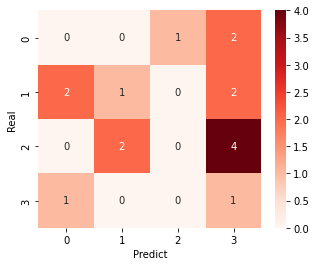

In [61]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_nav)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")


In [62]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 12.50%


In [63]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


18.75
18.75
31.25


In [64]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100


12.5

In [65]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


18.75

In [66]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test) 

accuracy_score(y_test, y_pred_lgr)*100

6.25